In [1]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl


In [11]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [3]:
#Loading the dataset
df = pd.read_csv(r"DG_preprocessing.csv")
for col in df.columns:
    print(col)

label
full_text
digit


In [4]:
df.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


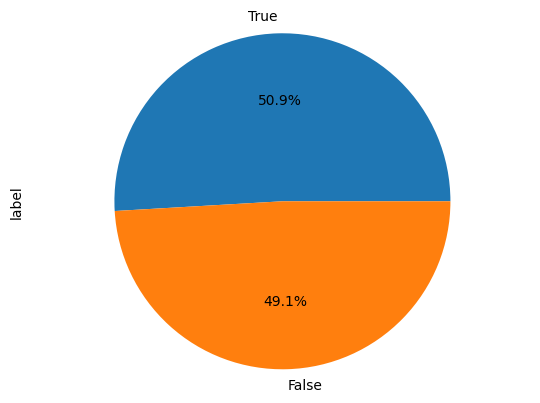

In [5]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [6]:
texts = df['full_text'].astype(str)
labels = df['label']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

df.head()


,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


In [7]:
print(df['label'])

0        False
1         True
2         True
3         True
4         True
         ...  
54032     True
54033     True
54034     True
54035     True
54036     True
Name: label, Length: 54037, dtype: bool


In [8]:
'''
In this cell, we are distributing the dataset, for training it is 70% and for testing it is 30%

'''
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

# need to convert or the text into weightage numeric number, hence using tokenizer.
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

maximum_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=maximum_length)
test_data = pad_sequences(test_sequences, maxlen=maximum_length)

model = Sequential()
model.add(Embedding(10000, 128, input_length=maximum_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=16, validation_data=(test_data, test_labels))

_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)


Epoch 1/5
2365/2365 [==============================] - 921s 389ms/step - loss: 0.1560 - accuracy: 0.9208 - val_loss: 0.1330 - val_accuracy: 0.9248
Epoch 2/5
2365/2365 [==============================] - 831s 351ms/step - loss: 0.0992 - accuracy: 0.9527 - val_loss: 0.1632 - val_accuracy: 0.9260
Epoch 3/5
2365/2365 [==============================] - 826s 349ms/step - loss: 0.0453 - accuracy: 0.9818 - val_loss: 0.1885 - val_accuracy: 0.9197
Epoch 4/5
2365/2365 [==============================] - 758s 321ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.2613 - val_accuracy: 0.9185
Epoch 5/5
507/507 [==============================] - 69s 137ms/step - loss: 0.3052 - accuracy: 0.9189
Accuracy: 0.9189489483833313


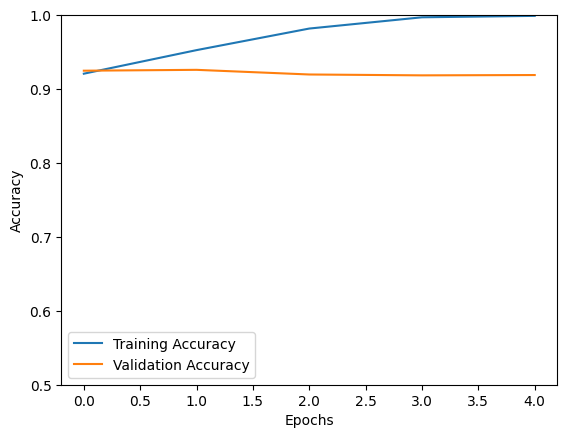

507/507 [==============================] - 70s 138ms/step


In [9]:

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()

# Predicting on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]




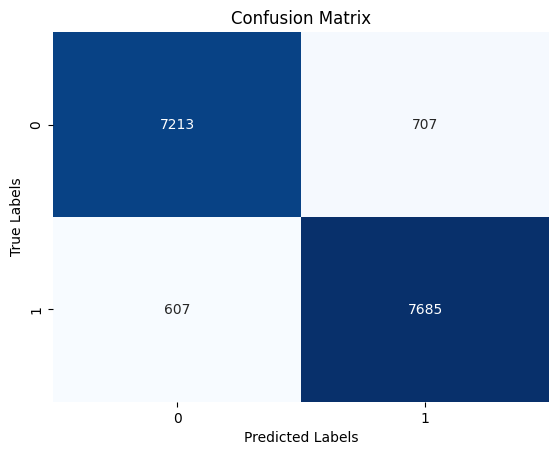

In [12]:
cm = confusion_matrix(test_labels, predicted_labels)

# Plotting confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Manual Testing:

### We have provided some statements from our dataset to check is it predicting correctly or not, we did so to confirm how reliable is our model working finely.

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Storing sentences to be tested.
sentence1 = ['candidates biography i m probably one of the four or five best known americans in the world 53 attorney republican ']
sentence2 = ['health care the american people support defunding obamacare and oppose shutting down the government 35 u s senator republican ']
sentence3 = ['veterans says hillary clinton said the veterans affairs scandal is over exaggerated she said she was satisfied with what was going on 49 president elect republican ']
sentence4 = ['federal budget health care the american healthcare system burns 18 percent of our national gdp nobody else is close 127 u s senator democrat ']
sentence5 = ['immigration says marco rubio is the one for an open border 176 candidate for u s senate and physician republican ']

# Passing the sentences to tokenizer.
sequences1 = tokenizer.texts_to_sequences(sentence1)
sequences2 = tokenizer.texts_to_sequences(sentence2)
sequences3 = tokenizer.texts_to_sequences(sentence3)
sequences4 = tokenizer.texts_to_sequences(sentence4)
sequences5 = tokenizer.texts_to_sequences(sentence5)

X_test1 = pad_sequences(sequences1, maxlen=maximum_length)
X_test2 = pad_sequences(sequences2, maxlen=maximum_length)
X_test3 = pad_sequences(sequences3, maxlen=maximum_length)
X_test4 = pad_sequences(sequences4, maxlen=maximum_length)
X_test5 = pad_sequences(sequences5, maxlen=maximum_length)

prediction1 = model.predict(X_test1)
prediction2 = model.predict(X_test2)
prediction3 = model.predict(X_test3)
prediction4 = model.predict(X_test4)
prediction5 = model.predict(X_test5)

# Set a threshold for classification
threshold = 0.5

# Make prediction and convert probabilities to binary based on the threshold
prediction1 = (prediction1 > threshold).astype(int)
prediction2 = (prediction2 > threshold).astype(int)
prediction3 = (prediction3 > threshold).astype(int)
prediction4 = (prediction4 > threshold).astype(int)
prediction5 = (prediction5 > threshold).astype(int)

print("The prediction for the first sentence is:", prediction1)
print("The prediction for the second sentence is:", prediction2)
print("The prediction for the third sentence is:", prediction3)
print("The prediction for the fourth sentence is:", prediction4)
print("The prediction for the fifth sentence is:", prediction5)





1/1 [==============================] - 0s 48ms/step
The prediction for the first sentence is: [[1]]
The prediction for the second sentence is: [[0]]
The prediction for the third sentence is: [[0]]
The prediction for the fourth sentence is: [[0]]
The prediction for the fifth sentence is: [[0]]


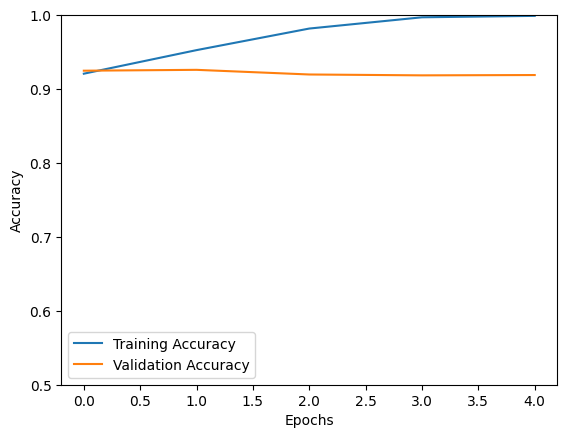

507/507 [==============================] - 69s 135ms/step


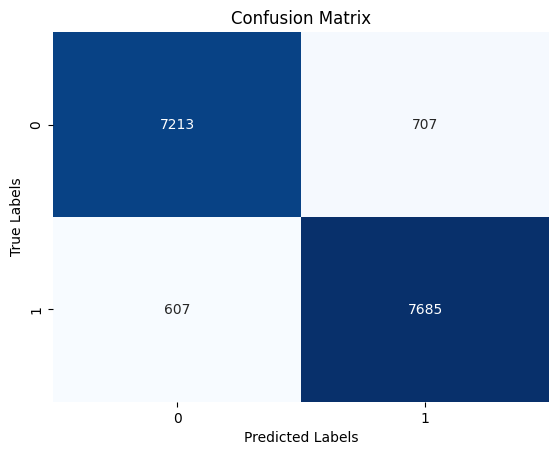

Classification Report:
              precision    recall  f1-score   support

        fake       0.92      0.91      0.92      7920
        real       0.92      0.93      0.92      8292

    accuracy                           0.92     16212
   macro avg       0.92      0.92      0.92     16212
weighted avg       0.92      0.92      0.92     16212

Accuracy: 91.89%
Precision (Fake): 92.24%
Precision (Real): 91.58%
Recall (Fake): 91.07%
Recall (Real): 92.68%
F1-Score (Fake): 91.65%
F1-Score (Real): 92.12%
Confusion Matrix:
[[7213  707]
 [ 607 7685]]


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()


predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]


cm = confusion_matrix(test_labels, predicted_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
report = classification_report(test_labels, predicted_labels, target_names=['fake', 'real'])
print(report)


accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average=None)


print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))


print("Confusion Matrix:")
print(cm)
